In [23]:
import numpy as np
import matplotlib.pyplot as plt

In [24]:
#파일 경로를 입력하기
file_path = r"D:\프로그래밍\슈퍼코딩 DATA.AI\project1\IMDB top 1000.csv"

In [25]:
#csv 모듈 안 쓰고 행의 각 열 분리하고 다시 행으로 회집
def split_csv_line(line, delimiter=','):
    #큰따옴표 안의 구분자는 무시하고 분리
    row = [] #한 행에 들어갈 열들을 담을 리스트
    current = '' #지금 읽고 있는 한 열 문자열을 임시로 저장
    in_quotes = False #큰따옴표 안에 있는지 여부를 확인하는 버튼. default는 False
    # 한 글자씩 검사
    for c in line:
        if c == '"':  #큰따옴표일 시 True/Fase 상태를 변환
            in_quotes = not in_quotes 
        elif c == delimiter and not in_quotes: #쉼표 + 큰타옴표 밖이면 지금까지 모은 문자열을 한 컬럼으로 추가
            row.append(current)
            current = '' #다음 열을 위해 current 초기화
        else:
            current += c #그냥 글자는 현재 current 문자열에 추가
    row.append(current) #current 리스트에 추가
    return row

In [26]:
#파일을 읽고 ndarray로 변환하는 함수 작성하기
def csv_to_ndarray(file_path, delimiter=',', header=0):
    data = []
    with open(file_path, 'r') as f:
        #헤더 건너뛰기
        for _ in range(header):
            next(f)
            
        #실제 데이터 읽기
        for line in f:
            #줄바꿈 제거 및 구분자를 통한 분리
            line = line.strip()
            row = split_csv_line(line, delimiter)
            #숫자 변환 시도
            numeric_value = []
            for item in row:
                try:
                    numeric_value.append(float(item))
                except ValueError:
                    numeric_value.append(item)
            data.append(numeric_value)

        #ndarray로 변환
        return np.array(data, dtype=object)

In [27]:
movie_data = csv_to_ndarray(file_path, header=1)

In [28]:
print(movie_data)
print(movie_data.shape)

[[0.0 '1. The Shawshank Redemption (1994)' 'R' ...
  'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.'
  'Director: Frank Darabont | Stars: Tim Robbins, Morgan Freeman, Bob Gunton, William Sadler'
  'Votes: 2,295,987 | Gross: $28.34M']
 [1.0 '2. The Godfather (1972)' 'R' ...
  'The aging patriarch of an organized crime dynasty transfers control of his clandestine empire to his reluctant son.'
  'Director: Francis Ford Coppola | Stars: Marlon Brando, Al Pacino, James Caan, Diane Keaton'
  'Votes: 1,584,782 | Gross: $134.97M']
 [2.0 '3. The Dark Knight (2008)' 'PG-13' ...
  'When the menace known as the Joker wreaks havoc and chaos on the people of Gotham, Batman must accept one of the greatest psychological and physical tests of his ability to fight injustice.'
  'Director: Christopher Nolan | Stars: Christian Bale, Heath Ledger, Aaron Eckhart, Michael Caine'
  'Votes: 2,260,649 | Gross: $534.86M']
 ...
 [997.0 '400.

In [29]:
#전체 영화 개수 구하기
num_movies = movie_data.shape[0]
print("전체 영화 개수:", num_movies)

#평점 열 추출하기
rate_column = movie_data[:, 5]

#object dtype을 float으로 변환하기
rate_column = np.array([float(x) for x in rate_column])

#평균, 최고, 최저 평점 계산
average_rate = np.mean(rate_column)
max_rate = np.max(rate_column)
min_rate = np.min(rate_column)

print("평균 평점:", average_rate)
print("최고 평점:", max_rate)
print("최저 평점:", min_rate)

전체 영화 개수: 1000
평균 평점: 8.0975
최고 평점: 9.3
최저 평점: 8.0


In [30]:
#타이틀 열 추출하기
title_column = movie_data[:, 1]
title = [t.split(".")[1].strip() for t in title_column]

#최고 평점 구하기
max_rate = np.max(rate_column)
print(max_rate)

#최고 평점을 받은 영화 인덱스
indices = np.where(rate_column == max_rate)[0]
#np.where로 인덱스 튜플을 가져오고 [0]으로 첫 번째 요소만 가져온다.
print(indices)

#출력
for i in indices:
    print(f"""
⭐ 최고 평점 영화 목록:
{title[i]} - 평점: {rate_column[i]}
    """)

9.3
[0]

⭐ 최고 평점 영화 목록:
The Shawshank Redemption (1994) - 평점: 9.3
    


In [31]:
#장르 열 처리하기: 큰따옴표 제거, 쉼표 기준 분리, 공백 제거 후 리스트에 담기
genres_column = []  # 모든 장르를 담을 리스트
movie_genres = []   # 영화별 장르 리스트

for g in movie_data[:, 4]:
    g_list = g.replace('"', '').split(',')
    clean_list = [genre.strip() for genre in g_list]
    movie_genres.append(clean_list)      #영화별 장르 저장
    genres_column.extend(clean_list)      #전체 장르 누적

print(movie_genres)
print("-" * 100)
print(genres_column)

[['Drama'], ['Crime', 'Drama'], ['Action', 'Crime', 'Drama'], ['Crime', 'Drama'], ['Action', 'Adventure', 'Drama'], ['Crime', 'Drama'], ['Biography', 'Drama', 'History'], ['Crime', 'Drama'], ['Action', 'Adventure', 'Sci-Fi'], ['Drama'], ['Action', 'Adventure', 'Drama'], ['Drama', 'Romance'], ['Western'], ['Biography', 'Drama', 'History'], ['Action', 'Adventure', 'Drama'], ['Action', 'Sci-Fi'], ['Biography', 'Crime', 'Drama'], ['Action', 'Adventure', 'Fantasy'], ['Drama'], ['Comedy', 'Drama', 'Thriller'], ['Adventure', 'Drama', 'Sci-Fi'], ['Crime', 'Drama'], ['Animation', 'Adventure', 'Family'], ['Drama', 'War'], ['Crime', 'Drama', 'Fantasy'], ['Comedy', 'Drama', 'Romance'], ['Crime', 'Drama', 'Mystery'], ['Crime', 'Drama', 'Thriller'], ['Action', 'Adventure', 'Fantasy'], ['Action', 'Drama', 'Mystery'], ['Action', 'Adventure', 'Drama'], ['Drama', 'Family', 'Fantasy'], ['Crime', 'Drama', 'Thriller'], ['Drama', 'Music'], ['Biography', 'Comedy', 'Drama'], ['Drama', 'Mystery', 'Sci-Fi'], ['

In [32]:
#중복을 제거하는 집합 데이터 타입으로 모든 장르 추출하기
all_genres = set(genres_column)

#장르별 평균 평점 계산하기: 사전형 사용
genre_avg = {}
for genre in all_genres:
    # 해당 장르를 포함한 영화별 장르 리스트와 인덱스를 동시에 가져와서 movie_data의 인덱스와 대응시키고 해당하는 리스트들을 리스트로 취합하기
    indices = [i for i, g_list in enumerate(movie_genres) if genre in g_list]
    avg_rate = np.mean(rate_column[indices])
    genre_avg[genre] = avg_rate

print(genre_avg)


{'Family': np.float64(8.16), 'Musical': np.float64(8.091666666666667), 'Animation': np.float64(8.059), 'Horror': np.float64(8.19230769230769), 'Film-Noir': np.float64(8.129411764705882), 'Adventure': np.float64(8.093364928909953), 'Fantasy': np.float64(8.11320754716981), 'Sport': np.float64(8.175), 'Biography': np.float64(8.066666666666666), 'Comedy': np.float64(8.075), 'Drama': np.float64(8.101373626373626), 'Action': np.float64(8.08937198067633), 'Sci-Fi': np.float64(8.10952380952381), 'Music': np.float64(8.082142857142857), 'Western': np.float64(8.357142857142858), 'Crime': np.float64(8.119318181818182), 'History': np.float64(8.093939393939394), 'Romance': np.float64(8.077551020408162), 'War': np.float64(8.20540540540541), 'Mystery': np.float64(8.109708737864077), 'Thriller': np.float64(8.072727272727272)}


In [33]:
def get_rate(item):
    # item = ('장르', 평균평점) 튜플
    return item[1]  # 두 번째 요소(평점)를 반환

#평균 평점 기준 내림차순 정렬
sorted_genres = sorted(genre_avg.items(), key=get_rate, reverse=True) #sorted() 함수의 매개변수 key(정렬 기준)을 사용

#출력하기
print("🎭 장르별 평균 평점:")
for genre, avg in sorted_genres:
    print(f"{genre}: {avg:.1f}")

🎭 장르별 평균 평점:
Western: 8.4
War: 8.2
Horror: 8.2
Sport: 8.2
Family: 8.2
Film-Noir: 8.1
Crime: 8.1
Fantasy: 8.1
Mystery: 8.1
Sci-Fi: 8.1
Drama: 8.1
History: 8.1
Adventure: 8.1
Musical: 8.1
Action: 8.1
Music: 8.1
Romance: 8.1
Comedy: 8.1
Thriller: 8.1
Biography: 8.1
Animation: 8.1


In [ ]:
#연도 추출 시험 코드
"""
years = []
for title in movie_data[:, 1]:
    if "(" in title and ")" in title:
        _ = title.split("(")[-1].replace(")", "").strip()
        if _.isdigit() and len(_) == 4:  # 숫자 4자리만 연도로 인정
            years.append(_)
        else:
            years.append(None)  # 잘못된 값은 None 처리
    else:
        years.append(None)
"""

In [34]:
#연도(key)와 평균 평점(value) 사전 만들기
#연도 추출을 위해 year = [y.split("(")[1].strip().replace(")", "") for y in movie_data[:, 1]]를 시도했으나 'I'도 출력되어 버린다.
#앞의 rate_column(평점 열)과 title_column(타이틀 열) 재사용
Released_Year = {}

#연도 추출 함수
def extract_year(title: str): #인자 옆 :는 인자의 데이터 유형에 대한 힌트 
    if "(" in title and ")" in title:
        return title.split("(")[-1].replace(")", "").strip()
    return None

#영화 제목과 평점을 순회하는 함수
#zip() 함수는 여러 시퀀스(리스트, 튜플 등)의 같은 인덱스 요소들을 하나로 묶어 튜플로 반환한다.
for title, rate in zip(title_column, rate_column):
    year = extract_year(title)
    if year:  # 연도가 추출된 것이 맞는 경우(extract_year() 함수는 None, 즉 False를 반환할 수도 있다)
        if year not in Released_Year:
            Released_Year[year] = []   # 새 연도는 리스트 초기화로 초기화한다. 즉 사전의 value 자리 데이터 유형은 리스트.
        
        Released_Year[year].append(float(rate))  # 평점 추가(조건과 상관 없이 실행되는 부분이므로 else가 안 들어간다)

# 연도별 평균 평점 계산
year_avg = {}
for y, r in Released_Year.items():
    year_avg[y] = np.mean(r)

# 출력 (연도순 정렬)
for y in sorted(year_avg.keys()):
    print(f"{y}: {year_avg[y]:.1f}")


1920: 8.1
1921: 8.3
1924: 8.2
1925: 8.2
1926: 8.1
1927: 8.1
1928: 8.1
1931: 8.4
1934: 8.1
1936: 8.5
1937: 8.1
1939: 8.1
1940: 8.1
1941: 8.3
1942: 8.3
1944: 8.3
1946: 8.6
1948: 8.1
1949: 8.1
1950: 8.3
1951: 8.1
1952: 8.3
1953: 8.1
1954: 8.2
1955: 8.2
1957: 8.2
1958: 8.2
1959: 8.2
1960: 8.2
1961: 8.2
1962: 8.2
1963: 8.3
1964: 8.4
1965: 8.3
1966: 8.3
1967: 8.1
1968: 8.4
1971: 8.4
1972: 8.5
1973: 8.2
1974: 8.6
1975: 8.3
1976: 8.2
1977: 8.6
1978: 8.1
1979: 8.3
1980: 8.3
1981: 8.4
1982: 8.1
1983: 8.3
1984: 8.2
1985: 8.3
1986: 8.2
1987: 8.2
1988: 8.3
1989: 8.1
1990: 8.7
1991: 8.1
1992: 8.0
1993: 8.0
1994: 8.6
1995: 8.1
1996: 8.0
1997: 8.1
1998: 8.1
1999: 8.1
2000: 8.1
2001: 8.1
2002: 8.2
2003: 8.0
2004: 8.0
2005: 8.1
2006: 8.1
2007: 8.0
2008: 8.1
2009: 8.0
2010: 8.1
2011: 8.1
2012: 8.1
2013: 8.0
2014: 8.1
2015: 8.0
2016: 8.0
2017: 8.1
2018: 8.1
2019: 8.1
2020: 8.7


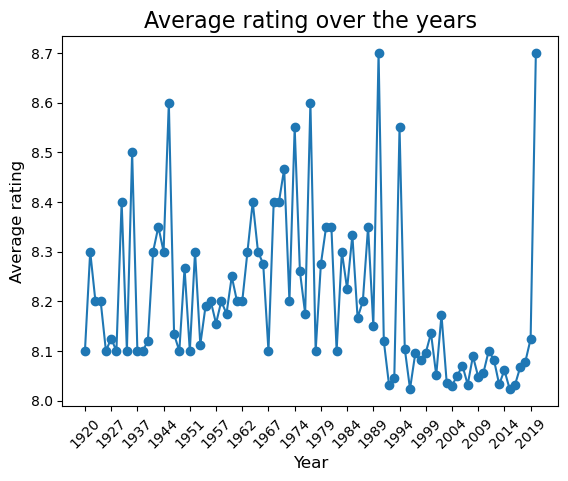

In [35]:
#Matplotlib을 사용하여 연도별 평균 평점 변화를 그래프로 표현하기
#연도와 평균 평점 분리 (정렬 필요 → 연도가 문자열이라 int로 변환 후 정렬)
years = sorted(year_avg.keys(), key=lambda x: int(x)) #sorted() 함수에서 key 매개변수는 정렬 기준을 지정하고, lambda는 매개변수: 표현식 문법을 지닌 임시 함수다.
avg_rates = [year_avg[y] for y in years]

# 그래프 그리기(o로 좌표 표시)
plt.plot(years, avg_rates, marker='o')

# 그래프 꾸미기
plt.title("Average rating over the years", fontsize=16)
plt.xlabel("Year", fontsize=12)
plt.ylabel("Average rating", fontsize=12)
plt.xticks(years[::5], rotation=45) #5년 단위로 눈금을 표시하고 기울이기

plt.show()

In [36]:
#프로젝트 확장 준비

# =========================
#앞선 1~5딘계는 순수 파이썬과 numpy만 사용했으나, 확장에서는 코드 내용의 가독성을 위해 pandas를 사용한다.
# =========================
import pandas as pd

#1. CSV 로드
df = pd.read_csv(file_path)

print(df)

     Unnamed: 0                                              Title  \
0             0                 1. The Shawshank Redemption (1994)   
1             1                            2. The Godfather (1972)   
2             2                          3. The Dark Knight (2008)   
3             3                   4. The Godfather: Part II (1974)   
4             4  5. The Lord of the Rings: The Return of the Ki...   
..          ...                                                ...   
995         995                       398. Scent of a Woman (1992)   
996         996                                399. Aladdin (1992)   
997         997                                    400. JFK (1991)   
998         998                      301. Nights of Cabiria (1957)   
999         999                        302. Throne of Blood (1957)   

    Certificate Duration                         Genre  Rate  Metascore  \
0             R  142 min                         Drama   9.3       80.0   
1        

In [44]:
#2. 연도(Title에서 추출) & Decade(10년 단위) ======
# 예: "1. The Shawshank Redemption (1994)" → 1994
df["Year"] = (df["Title"].str.extract(r"\((\d{4})\)").astype("float"))
# 괄호 속 4자리 숫자를 구하고 숫자화(float)하기

# 10년 단위 구간 (예: 1994 → 1990)
df["Decade"] = ((df["Year"] // 10) * 10).astype("Int64")
#연도를 10으로 나눠서 몫만 구하고, 거기에 10을 다시 곱하기

print(df[["Year", "Decade"]])

       Year  Decade
0    1994.0    1990
1    1972.0    1970
2    2008.0    2000
3    1974.0    1970
4    2003.0    2000
..      ...     ...
995  1992.0    1990
996  1992.0    1990
997  1991.0    1990
998  1957.0    1950
999  1957.0    1950

[1000 rows x 2 columns]


In [50]:
#3. Rate(평점) 컬럼 숫자 타입으로 변환하기
df["Rate"] = pd.to_numeric(df["Rate"])

print(df["Rate"])

0      9.3
1      9.2
2      9.0
3      9.0
4      8.9
      ... 
995    8.0
996    8.0
997    8.0
998    8.1
999    8.1
Name: Rate, Length: 1000, dtype: float64


In [51]:
#4. Info에서 Votes(관객수), Gross(흥행수익) 추출하기
#예: Info = 'Votes: 2,295,987 | Gross: $28.34M'
#Votes: 콤마 제거 후 숫자로 변환
df["Votes"] = (
    df["Info"]
    .str.extract(r"Votes:\s*([\d,]+)", expand=False) 
    #\s* : 공백(스페이스/탭/개행 등)이 0개 이상 있을 수 있음.
    #([\d,]+) : 숫자(\d)와 쉼표(,)가 1개 이상 연속하는 패턴을 포착한다. str.extract를 통해 괄호() 안 패턴만 추출한다.
    #expand=False로 dataframe이 아닌 series로 추출한다.
    .str.replace(",", "", regex=False)
    .astype("float")
)

#Gross: $숫자M → 숫자(달러)로 변환 (백만 단위 M만 처리)
#to_numeric에서 errors 매개변수에 "coerce"를 넣어서 Gross 정보가 없을 시 Nan으로 반환
gross_ = df["Info"].str.extract(r"Gross:\s*\$([\d\.]+)M", expand=False)
df["Gross"] = pd.to_numeric(gross_, errors="coerce") * 1_000_000  # 달러 금액

print(df[["Votes", "Gross"]])

         Votes        Gross
0    2295987.0   28340000.0
1    1584782.0  134970000.0
2    2260649.0  534860000.0
3    1107253.0   57300000.0
4    1614369.0  377850000.0
..         ...          ...
995   256515.0   63900000.0
996   367489.0  217350000.0
997   139634.0   70410000.0
998    42160.0     750000.0
999    45579.0          NaN

[1000 rows x 2 columns]


In [62]:
#5. Genre 분리: 한 컬럼에여러 장르가 있을 시 분리
#"Drama, Crime" → 두 행: Drama / Crime
#explode를 사용하면 원래 행이 여러 행으로 분리되지만 기존 인덱스는 그대로 유지된다. ex. 0  Movie1 | Drama 0,  Movie1 | Crime
#df.assign: 새 컬럼을 만들거나 기존 컬럼을 갱신할 때 사용한다. 새 컬럼 추가 / 기존 컬럼 갱신 + 새로운 df 반환할 때 사용
#replace 메서드에서 regex=False는 정규식을 사용하지 않겠다는 매개변수
df_divided = (
    df.assign(Genre=df["Genre"].str.replace('"', '', regex=False).str.split(","))
      .explode("Genre")
)
df_divided["Genre"] = df_divided["Genre"].str.strip()

print(df_divided)

     Unnamed: 0                               Title Certificate Duration  \
0             0  1. The Shawshank Redemption (1994)           R  142 min   
1             1             2. The Godfather (1972)           R  175 min   
1             1             2. The Godfather (1972)           R  175 min   
2             2           3. The Dark Knight (2008)       PG-13  152 min   
2             2           3. The Dark Knight (2008)       PG-13  152 min   
..          ...                                 ...         ...      ...   
997         997                     400. JFK (1991)           R  189 min   
997         997                     400. JFK (1991)           R  189 min   
998         998       301. Nights of Cabiria (1957)   Not Rated  110 min   
999         999         302. Throne of Blood (1957)   Not Rated  110 min   
999         999         302. Throne of Blood (1957)   Not Rated  110 min   

        Genre  Rate  Metascore  \
0       Drama   9.3       80.0   
1       Crime   9.2

In [86]:
#6. 분석에 필요한 열만 불필요한 정보 제거하기(추상화)
work = df_divided[["Decade", "Genre", "Rate", "Votes", "Gross"]].copy()

print(work)

     Decade     Genre  Rate      Votes        Gross
0      1990     Drama   9.3  2295987.0   28340000.0
1      1970     Crime   9.2  1584782.0  134970000.0
1      1970     Drama   9.2  1584782.0  134970000.0
2      2000    Action   9.0  2260649.0  534860000.0
2      2000     Crime   9.0  2260649.0  534860000.0
..      ...       ...   ...        ...          ...
997    1990   History   8.0   139634.0   70410000.0
997    1990  Thriller   8.0   139634.0   70410000.0
998    1950     Drama   8.1    42160.0     750000.0
999    1950     Drama   8.1    45579.0          NaN
999    1950   History   8.1    45579.0          NaN

[2508 rows x 5 columns]


In [90]:
#7. 시기(Decade) × 장르별 평균 계산
#groupby() 메서드의 dropna 매개변수를 통해 Nan 값을 포함 제외할지 설정한다.
#groupby().agg() 메서드에는 mean(), size() 같은 메서드의 키워드를 제공하여 여러 행에 대해 일괄로 계상할 수 있다.
#reset_index() 메서드로 multiindex를 singleindex로 재변환
agg = (
    work.groupby(["Decade", "Genre"], dropna=True)
        .agg(
            avg_rate=("Rate", "mean"),
            avg_votes=("Votes", "mean"),
            avg_gross=("Gross", "mean"),
            count=("Rate", "size"),   # 10년 동안 해당 장르 영화 수
        )
        .reset_index()
)

# 보기 좋게 Decade, 평균 평점 내림차순으로 정렬
agg = agg.sort_values(["Decade", "avg_rate"], ascending=[True, False])

print(agg)

     Decade      Genre  avg_rate      avg_votes     avg_gross  count
5      1920     Family  8.300000  110513.000000  5.450000e+06      1
11     1920     Sci-Fi  8.300000  157436.000000  1.240000e+06      1
4      1920      Drama  8.129412   59735.470588  9.447059e+05     17
3      1920     Comedy  8.123529   59142.588235  1.909000e+06     17
0      1920     Action  8.112500   74584.125000  1.023750e+06      8
..      ...        ...       ...            ...           ...    ...
141    2010    History  8.035294  345158.588235  1.217200e+08     17
146    2010    Romance  8.012500  364499.333333  1.357250e+07     24
152    2020  Biography  8.700000   44141.000000           NaN      1
153    2020      Drama  8.700000   44141.000000           NaN      1
154    2020    History  8.700000   44141.000000           NaN      1

[155 rows x 6 columns]


In [99]:
#8 결과 출력
for decade in agg["Decade"].dropna().unique(): #unique()는 중복을 제거하여, 10년당 한 번씩 반복하게 만든다.
    print(f"\n{int(decade)}년대 (장르 수: {agg[agg.Decade==decade].Genre.nunique()})") #agg[agg.Decade==decade]는 해당 시기의 데이터만 필터링하고, nunique는 장르의 고유 개수를 구한다.
    temp = agg[agg["Decade"] == decade] #특정 시기의 장르별 통계만 담은 작은 DataFrame.
    for _, row in temp.iterrows(): #iterrows()로 DataFrame을 한 줄씩 순회하며, _는 인덱스
        # NaN 방지: 값이 NaN이면 '-'로 출력
        rate_str  = f"{row['avg_rate']:.2f}"  if pd.notna(row['avg_rate'])  else "-"
        votes_str = f"{row['avg_votes']:.0f}" if pd.notna(row['avg_votes']) else "-"
        gross_str = f"${row['avg_gross']:.0f}" if pd.notna(row['avg_gross']) else "-"
        print(f" - {row['Genre']:<12} | 평점 평균: {rate_str:>6} | 관객수 평균: {votes_str:>10} | 흥행수익 평균: {gross_str:>12} | 작품수: {int(row['count'])}")
        #<: 왼쪽 정렬
        #>: 오른쪽 정렬
        #^: 가운데 정렬
        #숫자는 너비


1920년대 (장르 수: 12)
 - Family       | 평점 평균:   8.30 | 관객수 평균:     110513 | 흥행수익 평균:     $5450000 | 작품수: 1
 - Sci-Fi       | 평점 평균:   8.30 | 관객수 평균:     157436 | 흥행수익 평균:     $1240000 | 작품수: 1
 - Drama        | 평점 평균:   8.13 | 관객수 평균:      59735 | 흥행수익 평균:      $944706 | 작품수: 17
 - Comedy       | 평점 평균:   8.12 | 관객수 평균:      59143 | 흥행수익 평균:     $1909000 | 작품수: 17
 - Action       | 평점 평균:   8.11 | 관객수 평균:      74584 | 흥행수익 평균:     $1023750 | 작품수: 8
 - Adventure    | 평점 평균:   8.11 | 관객수 평균:      81864 | 흥행수익 평균:     $1582500 | 작품수: 8
 - Romance      | 평점 평균:   8.11 | 관객수 평균:      37626 | 흥행수익 평균:      $595000 | 작품수: 15
 - Biography    | 평점 평균:   8.10 | 관객수 평균:      46359 | 흥행수익 평균:       $20000 | 작품수: 7
 - Fantasy      | 평점 평균:   8.10 | 관객수 평균:      56194 | 흥행수익 평균:            - | 작품수: 7
 - History      | 평점 평균:   8.10 | 관객수 평균:      46359 | 흥행수익 평균:       $20000 | 작품수: 7
 - Horror       | 평점 평균:   8.10 | 관객수 평균:      56194 | 흥행수익 평균:            - | 작품수: 7
 - Mystery      | 평점 평균:   8.10 

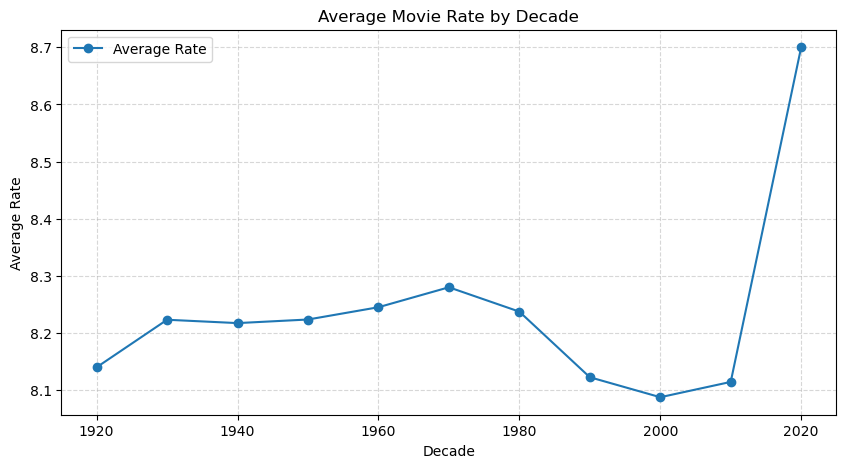

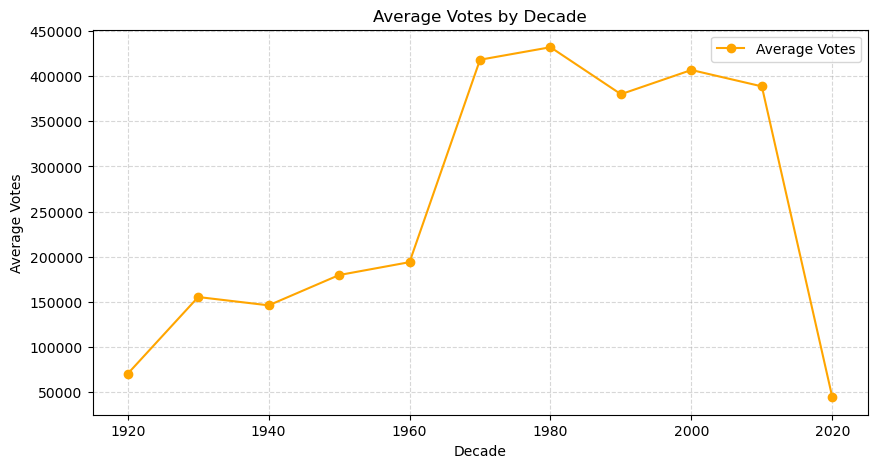

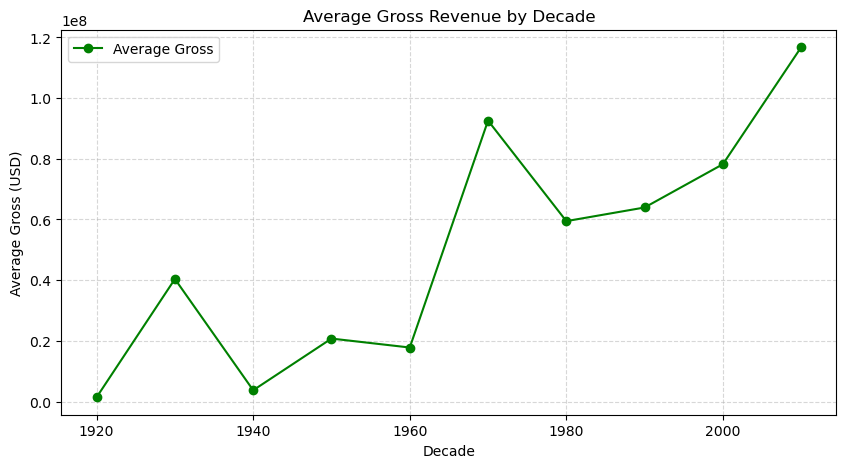

In [100]:
#1. 시기별 평균 평점
plt.figure(figsize=(10,5))
rate_by_decade = agg.groupby("Decade")["avg_rate"].mean() #장르 상관 없이 전반적 평균 계산
plt.plot(rate_by_decade.index, rate_by_decade.values, marker="o", label="Average Rate") #매개변수는 순서대로 X축, Y축, 데이터 포인트, 범례  
plt.title("Average Movie Rate by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Rate")
plt.grid(True, linestyle="--", alpha=0.5) #격자 메서드의 기본 구조: plt.grid(b=True, which='major', axis='both', **kwargs)
#alpha는 투명도다.
plt.legend() #범례(legend)란 그래프에서 각 선(line)이나 데이터 포인트가 무엇을 의미하는지 알려주는 작은 설명 상자
plt.show()

#2. 시기별 평균 관객 수
plt.figure(figsize=(10,5))
votes_by_decade = agg.groupby("Decade")["avg_votes"].mean()
plt.plot(votes_by_decade.index, votes_by_decade.values, marker="o", color="orange", label="Average Votes")
plt.title("Average Votes by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Votes")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()

#3. 시기별 평균 흥행 수익
plt.figure(figsize=(10,5))
gross_by_decade = agg.groupby("Decade")["avg_gross"].mean()
plt.plot(gross_by_decade.index, gross_by_decade.values, marker="o", color="green", label="Average Gross")
plt.title("Average Gross Revenue by Decade")
plt.xlabel("Decade")
plt.ylabel("Average Gross (USD)")
plt.grid(True, linestyle="--", alpha=0.5)
plt.legend()
plt.show()